# Machine Learning Final Project

### Import modules

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [210]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.model_selection import cross_val_score as cv_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import utils, preprocessing, decomposition, svm
%run Data_Extract.ipynb
%run SPOTIPY_CONSTANTS.ipynb
import matplotlib.pyplot as plt
from sklearn import svm
from numpy import ndarray

In [116]:
alice_data

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,rating
0,3.0,https://api.spotify.com/v1/audio-analysis/6zAK...,4.0,85742,7.0,6zAKxjvCWtoa2FrzNNkG0J,2.0,3,6.0,235.0,1,2.0,233.0,231,https://api.spotify.com/v1/tracks/6zAKxjvCWtoa...,audio_features,spotify:track:6zAKxjvCWtoa2FrzNNkG0J,4.0,0
1,2.0,https://api.spotify.com/v1/audio-analysis/2qUZ...,5.0,228147,5.0,2qUZliZ9NHUYIAZqRNe6pZ,2.0,7,2.0,235.0,235,2.0,232.0,231,https://api.spotify.com/v1/tracks/2qUZliZ9NHUY...,audio_features,spotify:track:2qUZliZ9NHUYIAZqRNe6pZ,3.0,0
2,2.0,https://api.spotify.com/v1/audio-analysis/7Ajf...,6.0,346267,4.0,7AjfklMN4WpQYz5FkT4E66,2.0,8,2.0,235.0,235,2.0,232.0,231,https://api.spotify.com/v1/tracks/7AjfklMN4WpQ...,audio_features,spotify:track:7AjfklMN4WpQYz5FkT4E66,6.0,0
3,3.0,https://api.spotify.com/v1/audio-analysis/397f...,5.0,250867,4.0,397fxHew7NyjryGWGr1Imy,2.0,6,2.0,234.0,235,2.0,232.0,231,https://api.spotify.com/v1/tracks/397fxHew7Nyj...,audio_features,spotify:track:397fxHew7NyjryGWGr1Imy,6.0,0
4,2.0,https://api.spotify.com/v1/audio-analysis/0iFo...,6.0,307267,6.0,0iFoxKAevkzG2bVgFLNmoV,2.0,8,4.0,235.0,1,2.0,233.0,231,https://api.spotify.com/v1/tracks/0iFoxKAevkzG...,audio_features,spotify:track:0iFoxKAevkzG2bVgFLNmoV,6.0,0
5,2.0,https://api.spotify.com/v1/audio-analysis/62cr...,7.0,339976,6.0,62cr4T5CnlHhRVPLQQ3Var,2.0,7,2.0,235.0,235,2.0,233.0,231,https://api.spotify.com/v1/tracks/62cr4T5CnlHh...,audio_features,spotify:track:62cr4T5CnlHhRVPLQQ3Var,7.0,0
6,4.0,https://api.spotify.com/v1/audio-analysis/6kMT...,5.0,205014,5.0,6kMTUktQ2yjTrGPx2GfbJd,2.0,4,7.0,235.0,235,2.0,232.0,231,https://api.spotify.com/v1/tracks/6kMTUktQ2yjT...,audio_features,spotify:track:6kMTUktQ2yjTrGPx2GfbJd,5.0,0
7,2.0,https://api.spotify.com/v1/audio-analysis/2n5A...,7.0,238631,6.0,2n5A1FNTftsrrpu1KifXT3,3.0,2,3.0,235.0,235,2.0,233.0,231,https://api.spotify.com/v1/tracks/2n5A1FNTftsr...,audio_features,spotify:track:2n5A1FNTftsrrpu1KifXT3,5.0,0
8,5.0,https://api.spotify.com/v1/audio-analysis/7qiZ...,6.0,233713,5.0,7qiZfU4dY1lWllzX7mPBI3,2.0,7,2.0,235.0,235,2.0,233.0,231,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,7.0,0
9,3.0,https://api.spotify.com/v1/audio-analysis/5CtI...,6.0,228827,6.0,5CtI0qwDJkDQGwXD1H1cLb,2.0,2,2.0,235.0,1,2.0,232.0,231,https://api.spotify.com/v1/tracks/5CtI0qwDJkDQ...,audio_features,spotify:track:5CtI0qwDJkDQGwXD1H1cLb,6.0,0


### Extract relevant track features and convert dataframes to matrices

In [117]:
relevant_features=['acousticness',
                         'danceability',
                         'energy',
                         'instrumentalness',
                         'key',
                         'liveness',
                         'loudness',
                         'mode',
                         'speechiness',
                         'valence',
                         'rating']

In [118]:
alice_data=alice_data[relevant_features]
emma_data=emma_data[relevant_features]

alice_data & emma_data: 

pandas dataframes of user preferences containing all relevant track features 

matrix_a & matrix_e:

numpy matrices of user preferences containing all relevant track features

In [119]:
matrix_a = pd.DataFrame.as_matrix(alice_data)
matrix_e = pd.DataFrame.as_matrix(emma_data)

/Users/alice/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/alice/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Normalize the data

In [120]:
Xa = matrix_a[1:,0:matrix_a.shape[1] - 1]
#last column is the target
ya = matrix_a[1:,matrix_a.shape[1] - 1:matrix_a.shape[1]]
# Standardize data
standardized_Xa = preprocessing.scale(Xa)

In [121]:
Xe = matrix_e[:,0:matrix_e.shape[1] - 1]
#last column is the target
ye = matrix_e[:,matrix_e.shape[1] - 1:matrix_e.shape[1]]
# Standardize data
standardized_Xe = preprocessing.scale(Xe)

In [122]:
alice_data

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,rating
0,3.0,4.0,7.0,2.0,3,6.0,235.0,1,2.0,4.0,0
1,2.0,5.0,5.0,2.0,7,2.0,235.0,235,2.0,3.0,0
2,2.0,6.0,4.0,2.0,8,2.0,235.0,235,2.0,6.0,0
3,3.0,5.0,4.0,2.0,6,2.0,234.0,235,2.0,6.0,0
4,2.0,6.0,6.0,2.0,8,4.0,235.0,1,2.0,6.0,0
5,2.0,7.0,6.0,2.0,7,2.0,235.0,235,2.0,7.0,0
6,4.0,5.0,5.0,2.0,4,7.0,235.0,235,2.0,5.0,0
7,2.0,7.0,6.0,3.0,2,3.0,235.0,235,2.0,5.0,0
8,5.0,6.0,5.0,2.0,7,2.0,235.0,235,2.0,7.0,0
9,3.0,6.0,6.0,2.0,2,2.0,235.0,1,2.0,6.0,0


In [123]:
pd.DataFrame(standardized_Xa)

,0,1,2,3,4,5,6,7,8,9
0,-0.799949,-0.232100,-0.062545,-0.314080,0.320034,-0.610068,0.517549,1.458682,-0.290095,-1.542172
1,-0.799949,0.844967,-0.884895,-0.314080,0.659681,-0.610068,0.517549,1.458682,-0.290095,0.608991
2,-0.158182,-0.232100,-0.884895,-0.314080,-0.019613,-0.610068,-1.932184,1.458682,-0.290095,0.608991
3,-0.799949,0.844967,0.759805,-0.314080,0.659681,1.452544,0.517549,-0.685550,-0.290095,0.608991
4,-0.799949,1.922035,0.759805,-0.314080,0.320034,-0.610068,0.517549,1.458682,-0.290095,1.326045
5,0.483585,-0.232100,-0.062545,-0.314080,-0.698908,4.546461,0.517549,1.458682,-0.290095,-0.108063
6,-0.799949,1.922035,0.759805,0.588742,-1.378202,0.421238,0.517549,1.458682,-0.290095,-0.108063
7,1.125352,0.844967,-0.062545,-0.314080,0.320034,-0.610068,0.517549,1.458682,-0.290095,1.326045
8,-0.158182,0.844967,0.759805,-0.314080,-1.378202,-0.610068,0.517549,-0.685550,-0.290095,0.608991
9,-0.158182,-0.232100,0.759805,-0.314080,-1.378202,-0.610068,0.517549,-0.685550,2.191437,1.326045


### Randomize and split the data

In [420]:
Xa = Xa
ya = ya.ravel()
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.2)
Xa_train, Xa_val, ya_train, ya_val = train_test_split(Xa_train, ya_train, test_size=0.1)

In [421]:
Xe = Xe
ye = ye.ravel()
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye, test_size=0.2)
Xe_train, Xe_val, ye_train, ye_val = train_test_split(Xe_train, ye_train, test_size=0.1)

In [422]:
model = svm.SVR(kernel='linear',gamma=0.9,C=0.001)
clfa.score(Xa_test, ya_test)

0.44366197183098594

In [423]:
model = svm.SVC(kernel='linear',gamma=0.9,C=0.001)
clfe.score(Xe_test, ye_test)

0.4594594594594595

In [309]:
for c in np.linspace(0.00000000001,1,100):
    model = svm.SVC(kernel='linear',gamma=0.9,C=c)
    clfa = model.fit(Xa_train, ya_train)
    clfe = model.fit(Xe_train, ye_train)
    scorea=clfa.score(Xa_test, ya_test)
    scoree=clfa.score(Xe_test, ye_test)
    c_score_a.append(scorea)
    c_score_e.append(scoree)

In [343]:
g_score_a=[]
g_score_e=[]

In [344]:
for g in np.linspace(0.001,1,100):
    model = svm.SVC(kernel='linear',gamma=g,C=0.000001)
    clfa = model.fit(Xa_train, ya_train)
    clfe = model.fit(Xe_train, ye_train)
    scorea=clfa.score(Xa_test, ya_test)
    scoree=clfa.score(Xe_test, ye_test)
    g_score_a.append(scorea)
    g_score_e.append(scoree)

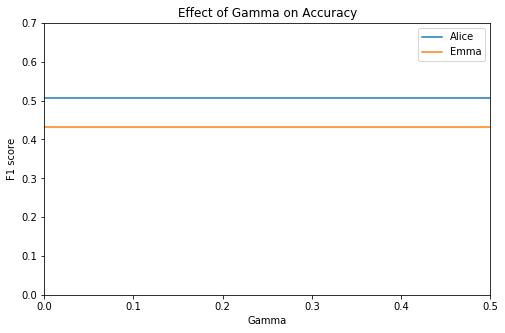

In [345]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(0.001,1,100),g_score_a,label='Alice')
plt.plot(np.linspace(0.001,1,100),g_score_e,label='Emma')
plt.xlim((0,.5))
plt.ylim((0,.7))
plt.xlabel('Gamma')
plt.ylabel('F1 score')
plt.title('Effect of Gamma on Accuracy')
plt.legend()
plt.savefig('g_val.png')

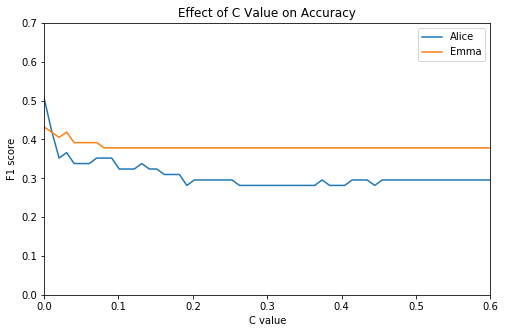

In [336]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(0.00000000001,1,100),c_score_a,label='Alice')
plt.plot(np.linspace(0.00000000001,1,100),c_score_e,label='Emma')
plt.xlim((0,.6))
plt.ylim((0,.7))
plt.xlabel('C value')
plt.ylabel('F1 score')
plt.title('Effect of C Value on Accuracy')
plt.legend()
plt.savefig('c_val.png')

In [237]:
clfa.score(Xa_test, ya_test)

0.29577464788732394

In [188]:
clfe.score(Xe_test, ye_test)

0.32432432432432434